### Лабораторная работа №2

**Вариант 2**. Датасет: *Динамика продаж в супермаркете*.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv('../data/bigmart.csv').drop_duplicates()

Исправление признаков в датасете

In [6]:
df.drop(axis=1, columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

**Численные признаки**

In [7]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(value='Medium', inplace=True)
df['Outlet_Establishment_Year'] = (2013 - df['Outlet_Establishment_Year'])
df['Item_Visibility'].replace(to_replace=0, value= df['Item_Visibility'].quantile(q=.10),inplace = True)
df.head()

/tmp/ipykernel_851/3784169956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
/tmp/ipykernel_851/3784169956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.012042,Fruits and Vegetables,182.0950,15,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.012042,Household,53.8614,26,High,Tier 3,Supermarket Type1,994.7052


**Категориальные признаки**

In [8]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
dummy = pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)
df = dummy
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,4,443.4228,True,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,17.50,0.016760,141.6180,14,2097.2700,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,19.20,0.012042,182.0950,15,732.3800,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,8.93,0.012042,53.8614,26,994.7052,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [9]:
X = df.drop(['Item_Outlet_Sales'], axis=1).values
y = df['Item_Outlet_Sales'].values

In [10]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape

(6818, 27)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

#### Рекурентная нейронная сеть

Используем смешанный подход, потому что отсутствует чёткая последовательность данных
поэтому добавляем полносвязные слои.

In [63]:
model_rnn = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(64),
    Dense(32, activation='relu'),
    Dense(1),
])

model_rnn.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history_rnn = model_rnn.fit(
    X_train,
    y_train,
    epochs=25,
    validation_data=(X_val, y_val),
    verbose=1,
    validation_freq=1,
)

Epoch 1/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.6806 - mae: 0.6150 - val_loss: 0.5358 - val_mae: 0.5449
Epoch 2/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5298 - mae: 0.5343 - val_loss: 0.7319 - val_mae: 0.6470
Epoch 3/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5216 - mae: 0.5315 - val_loss: 0.5893 - val_mae: 0.5638
Epoch 4/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.4913 - mae: 0.5093 - val_loss: 0.7008 - val_mae: 0.6043
Epoch 5/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.4847 - mae: 0.5107 - val_loss: 0.4931 - val_mae: 0.5246
Epoch 6/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4699 - mae: 0.5023 - val_loss: 0.4819 - val_mae: 0.5122
Epoch 7/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4533 - mae: 0.4897 - val_loss: 0.5248 - val_mae: 0.5438
Epoch 8/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4336 - mae: 0.4846 - val_loss: 0.4855 - val_mae: 0.5118
Epoch 9/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/

In [17]:
import matplotlib.pyplot as plt

#### График потерь

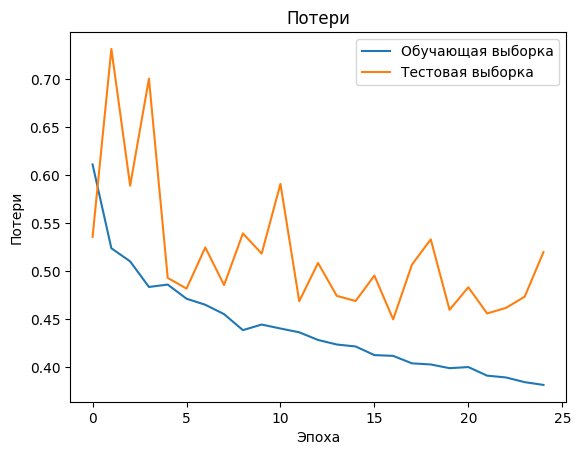

In [64]:
plt.plot(history_rnn.history['loss'], label='Обучающая выборка')
plt.plot(history_rnn.history['val_loss'], label='Тестовая выборка')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('Потери')
plt.legend()
plt.show()

#### График MAE (Mean Absolute Error)

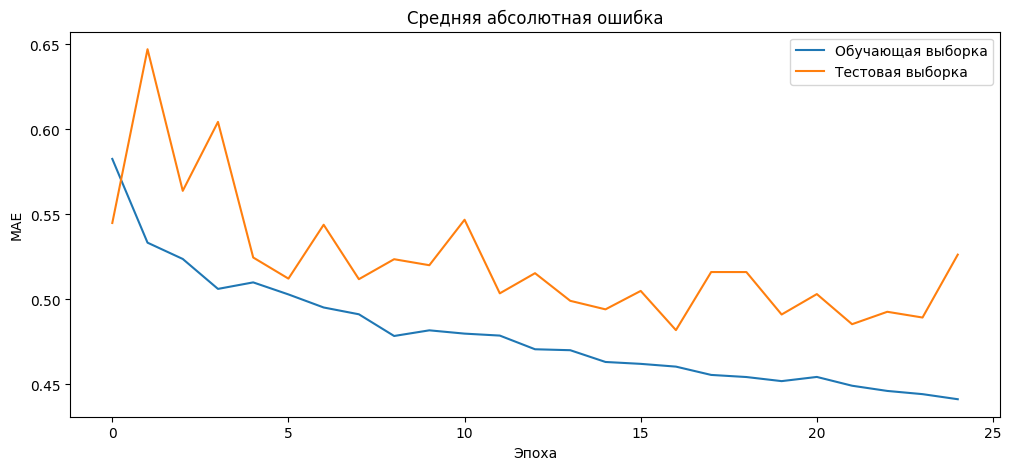

In [65]:
plt.figure(figsize=(12, 5))
plt.plot(history_rnn.history['mae'], label='Обучающая выборка')
plt.plot(history_rnn.history['val_mae'], label='Тестовая выборка')
plt.title('Средняя абсолютная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.show()

Text(0, 0.5, 'Количество продаж')

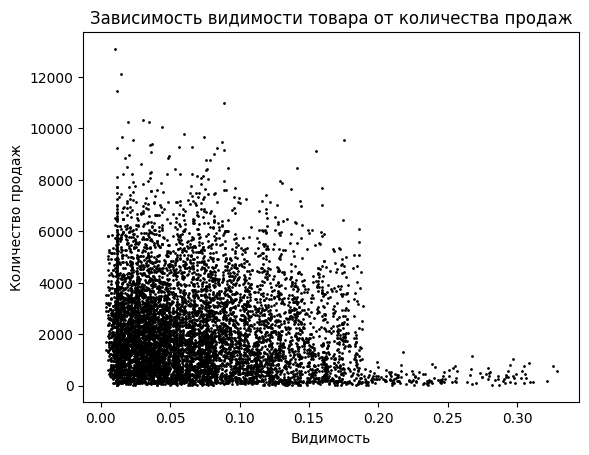

In [31]:
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'], s=1, c='black')
plt.title('Зависимость видимости товара от количества продаж')
plt.xlabel('Видимость')
plt.ylabel('Количество продаж')

In [68]:
model_dense = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    Dense(32),
    Dense(1)
])

model_dense.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_rnn = model_rnn.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
  1/214 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.2382 - mae: 0.3562

/home/k1/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3629 - mae: 0.4320 - val_loss: 0.5077 - val_mae: 0.5162
Epoch 2/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3654 - mae: 0.4369 - val_loss: 0.4746 - val_mae: 0.5024
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3581 - mae: 0.4290 - val_loss: 0.5036 - val_mae: 0.5097
Epoch 4/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3682 - mae: 0.4349 - val_loss: 0.4580 - val_mae: 0.4873
Epoch 5/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3516 - mae: 0.4247 - val_loss: 0.4847 - val_mae: 0.4948
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3591 - mae: 0.4273 - val_loss: 0.5056 - val_mae: 0.4972
Epoch 7/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3536 - mae: 0.4274 - val_loss: 0.4940 - val_mae: 0.5079
Epoch 8/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3440 - mae: 0.4219 - val_loss: 0.4873 - val_mae: 0.4862
Epoch 9/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss

In [69]:
y_pred_rnn = model_rnn.predict(X_val).flatten()
y_pred_dense = model_dense.predict(X_val).flatten()

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


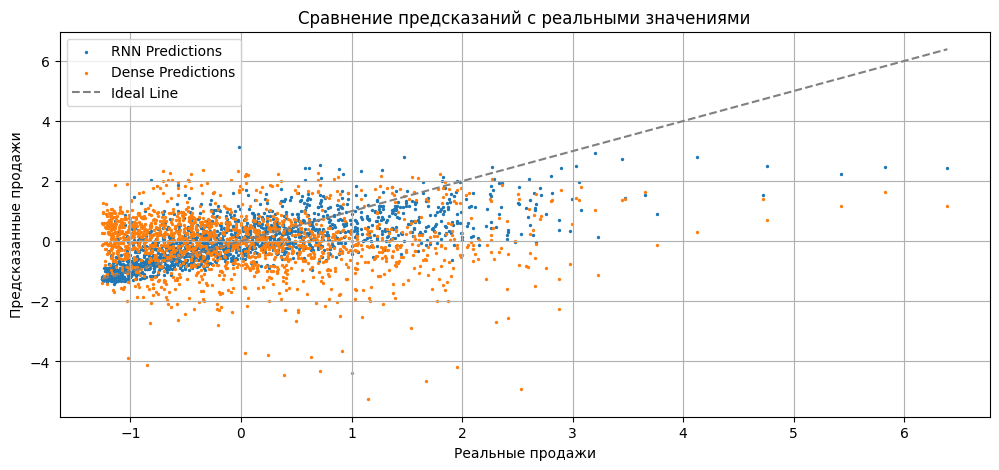

In [74]:
plt.figure(figsize=(12, 5))
plt.scatter(y_val, y_pred_rnn, s=2, label='RNN Predictions')
plt.scatter(y_val, y_pred_dense, s=2, label='Dense Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='gray', label='Ideal Line')
plt.title('Сравнение предсказаний с реальными значениями')
plt.xlabel('Реальные продажи')
plt.ylabel('Предсказанные продажи')
plt.legend()
plt.grid(True)
plt.show()